In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

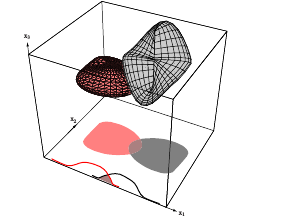

Fig.3: Two three-dimensional distributions have nonoverlapping densities, and thus in three dimensions the Bayes error vanishes. When projected to a subspace — here, the two-dimensional x1 − x2 subspace or a one-dimensional x1 subspace — there can be greater overlap of the projected distributions, and hence greater Bayes errors.

## Problems of Dimensionality

In practical multicategory applications, it is not at all unusual to encounter problems involving fifty or a hundred features, particularly if the features are binary valued. We might typically believe that each feature is useful for at least some of the discriminations; while we may doubt that each feature provides independent information, intentionally superfluous features have not been included. There are two issues that must be confronted. The most important is how classification accuracy depends upon the dimensionality (and amount of training data); the second is the computational complexity of designing the classifier.

##  Accuracy, Dimension, and Training Sample Size

If the features are statistically independent, there are some theoretical results that suggest the possibility of excellent performance. For example, consider the two-class multivariate normal case with the same covariance where 

$$
p(x|\omega_j) \sim N(\mu_j, \Sigma), \quad j = 1, 2.
$$

If the a priori probabilities are equal, then it is not hard to show that the Bayes error rate is given by 

$$
P(e) = \frac{1}{\sqrt{2\pi r/2}} \int_{-\infty}^1 e^{-u/2} du, \tag{71}
$$

where $ r $ is the squared Mahalanobis distance:

$$
r^2 = (\mu_1 - \mu_2)^T \Sigma^{-1} (\mu_1 - \mu_2). \tag{72}
$$

Thus, the probability of error decreases as $ r $ increases, approaching zero as $ r $ approaches infinity. In the conditionally independent case, 

$$
\Sigma = \text{diag}(\sigma_1^2, \ldots, \sigma_d^2),
$$

and 

$$
r^2 = \sum_{i=1}^d \frac{(\mu_{i1} - \mu_{i2})^2}{\sigma_i^2}. \tag{73}
$$

This shows how each feature contributes to reducing the probability of error. Naturally, the most useful features are the ones for which the difference between the means is large relative to the standard deviations. However, no feature is useless if its means for the two classes differ. An obvious way to reduce the error rate further is to introduce new, independent features. Each new feature need not add much, but if $ r $ can be increased without limit, the probability of error can be made arbitrarily small.

In general, if the performance obtained with a given set of features is inadequate, it is natural to consider adding new features, particularly ones that will help separate the class pairs most frequently confused. Although increasing the number of features increases the cost and complexity of both the feature extractor and the classifier, it is often reasonable to believe that the performance will improve. After all, if the probabilistic structure of the problem were completely known, the Bayes risk could not possibly be increased by adding new features. At worst, the Bayes classifier would ignore the new features, but if the new features provide any additional information, the performance must improve (see Figure 3.3).

![Figure 3.3: Two three-dimensional distributions have nonoverlapping densities.](link-to-image)

Unfortunately, it has frequently been observed in practice that, beyond a certain point, the inclusion of additional features leads to worse rather than better performance. The basic source of the difficulty can always be traced to the fact that we have the wrong model — e.g., the Gaussian assumption or conditional assumption are wrong — or the number of design or training samples is finite and thus the distributions are not estimated accurately. However, analysis of the problem is both challenging and subtle. Simple cases do not exhibit the experimentally observed phenomena, and more realistic cases are difficult to analyze. In an attempt to provide some rigor, we shall return to topics related to problems of dimensionality and sample size in Chapter ??. 

## Computational Complexity

We have mentioned that one consideration affecting our design methodology is that of the computational difficulty, and here the technical notion of computational complexity can be useful. 

First, we will need to understand the notion of the order of a function $ f(x) $: we say that $ f(x) $ is “of the order of $ h(x) $” — written $ f(x) = O(h(x)) $ and generally read “big oh of $ h(x) $” — if there exist constants $ c_0 $ and $ x_0 $ such that 

$$
|f(x)| \leq c_0 |h(x)| \quad \text{for all } x > x_0.
$$ 

This means simply that for sufficiently large $ x $, an upper bound on the function grows no worse than $ h(x) $. 

For instance, suppose 

$$
f(x) = a_0 + a_1 x + a_2 x^2; 
$$ 

in that case we have 

$$
f(x) = O(x^2) 
$$ 

because for sufficiently large $ x $, the constant, linear, and quadratic terms can be “overcome” by proper choice of $ c_0 $ and $ x_0 $. 

The generalization to functions of two or more variables is straightforward. It should be clear that by the definition above, the big oh order of a function is not unique. For instance, we can describe our particular $ f(x) $ as being $ O(x^2) $, $ O(x^3) $, $ O(x^4) $, $ O(x^2 \ln x) $.

To be more precise in describing the order of a function, we say that $ f(x) = \Theta(h(x)) $ “big theta of $ h(x) $” if there are constants $ x_0 $, $ c_1 $, and $ c_2 $ such that for $ x > x_0 $, 

$$
c_1 h(x) \leq f(x) \leq c_2 h(x).
$$ 

Thus our simple quadratic function above would obey $ f(x) = \Theta(x^2) $, but would not obey $ f(x) = \Theta(x^3) $. 

In describing the computational complexity of an algorithm, we are generally interested in the number of basic mathematical operations, such as additions, multiplications, and divisions it requires, or in the time and memory needed on a computer. To illustrate this concept, we consider the complexity of maximum likelihood estimation of the parameters in a classifier for Gaussian priors in $ d $ dimensions, with $ n $ training samples for each of $ c $ categories. For each category, it is necessary to calculate the discriminant function of the form:

$$
g(x) = -\frac{1}{2} (x - \hat{\mu})^T \Sigma^{-1} (x - \hat{\mu}) - \frac{1}{2} \ln(2\pi) - \frac{1}{2} \ln |\Sigma| + \ln P(\omega). \tag{74}
$$

The computational complexity of finding the sample mean $ \hat{\mu} $ is $ O(nd) $, since for each of the $ d $ dimensions we must add $ n $ component values. The required division by $ n $ in the mean calculation is a single computation, independent of the number of points, and hence does not affect this complexity. 

For each of the $ \frac{d(d + 1)}{2} $ independent components of the sample covariance matrix $ \Sigma $, there are $ n $ multiplications and additions, giving a complexity of $ O(d^2 n) $. Once $ \Sigma $ has been computed, its determinant is an $ O(d^2) $ calculation, as we can easily verify by counting the number of operations in matrix “sweep” methods. The inverse can be calculated in $ O(d^3) $ calculations, for instance by Gaussian elimination.

The complexity of estimating $ P(\omega) $ is of course $ O(n) $. Thus, the overall computational complexity for learning in this Bayes classifier is $ O(cd^2 n) $. Since $ c $ is typically a constant much smaller than $ d^2 $ or $ n $, we can call our complexity $ O(d^2 n) $.

We saw in Section 3.7 that it was generally desirable to have more training data from a larger dimensional space; our complexity analysis shows the steep cost in so doing. We next reconsider the matter of estimating a covariance matrix in a bit more detail. This requires the estimation of $ \frac{d(d+1)}{2} $ parameters — the $ d $ diagonal elements and $ \frac{d(d - 1)}{2} $ independent off-diagonal elements.

We observe first that the appealing maximum likelihood estimate 

$$
\hat{\Sigma} = \frac{1}{n} \sum_{k=1}^{n} (x_k - \bar{m})(x_k - \bar{m})^T, \tag{75}
$$ 

is an $ O(nd^2) $ calculation, is the sum of $ n - 1 $ independent $ d \times d $ matrices of rank one, and thus is guaranteed to be singular if $ n \leq d $. Since we must invert $ \hat{\Sigma} $ in computing the discriminant, it is impossible to perform this computation successfully if the sample size is too small. As a practical matter, the general recommendation is that we have at least 

$$
n > 5d 
$$ 

if we are to have reliable estimators of the covariance matrix. 

### Summary

- The basic computational complexity of a Gaussian classifier is of the order $ O(cd^2 n) $ where $ c $ is the number of categories and $ d $ is the dimension of the feature space.
- The inclusion of additional features can lead to worse performance if $ n $ is not adequately large, particularly if $ n \leq d $.


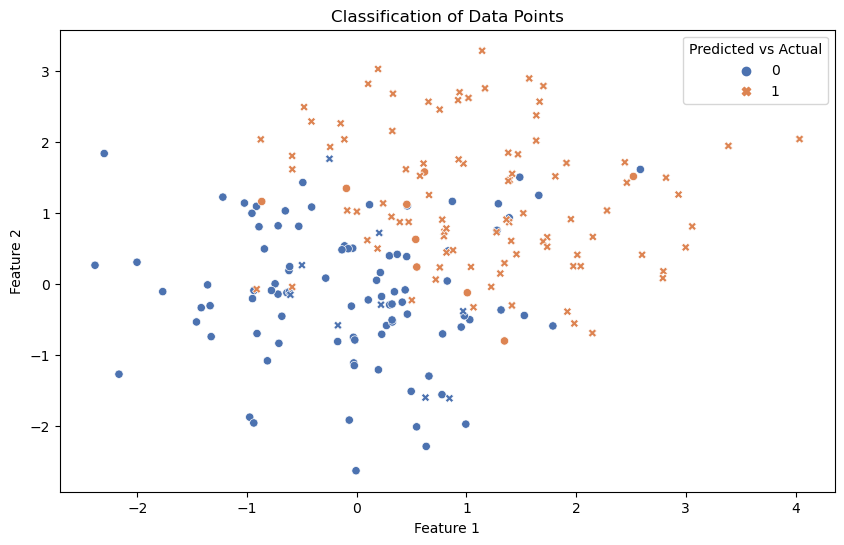

Computational Complexity (O(cd^2n)): 5000


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to generate synthetic data for two classes
def generate_data(n_samples=100, n_features=5, class_means=None, class_cov=None):
    if class_means is None:
        class_means = [np.zeros(n_features), np.ones(n_features)]
    if class_cov is None:
        class_cov = [np.eye(n_features), np.eye(n_features)]
    
    data = []
    labels = []
    
    for i in range(2):
        samples = np.random.multivariate_normal(class_means[i], class_cov[i], n_samples)
        data.append(samples)
        labels.extend([i] * n_samples)

    return np.vstack(data), np.array(labels)

# Function to compute mean and covariance
def compute_statistics(X):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    return mean, cov

# Function to calculate discriminant function for a Gaussian classifier
def discriminant_function(x, mean, cov, prior):
    inv_cov = np.linalg.inv(cov)
    term1 = -0.5 * (x - mean).T @ inv_cov @ (x - mean)
    term2 = -0.5 * np.log(np.linalg.det(cov))
    term3 = np.log(prior)
    return term1 + term2 + term3

# Function to classify data points
def classify(X, means, covs, priors):
    scores = np.zeros((X.shape[0], len(priors)))
    for i in range(len(priors)):
        for j in range(X.shape[0]):
            scores[j, i] = discriminant_function(X[j], means[i], covs[i], priors[i])
    return np.argmax(scores, axis=1)

# Generate synthetic data
n_samples_per_class = 100
n_features = 5
X, y = generate_data(n_samples=n_samples_per_class, n_features=n_features)

# Compute statistics for each class
class_means = []
class_covs = []
priors = [0.5, 0.5]  # Assuming equal priors for simplicity

for i in range(2):
    class_data = X[y == i]
    mean, cov = compute_statistics(class_data)
    class_means.append(mean)
    class_covs.append(cov)

# Classify the data points
predictions = classify(X, class_means, class_covs, priors)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions, style=y, palette="deep")
plt.title('Classification of Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Predicted vs Actual', loc='upper right')
plt.show()

# Computational Complexity Analysis
def computational_complexity(n, d, c):
    # Complexity of the Gaussian classifier
    complexity = c * (d**2 * n)
    return complexity

print(f"Computational Complexity (O(cd^2n)): {computational_complexity(n_samples_per_class, n_features, 2)}")


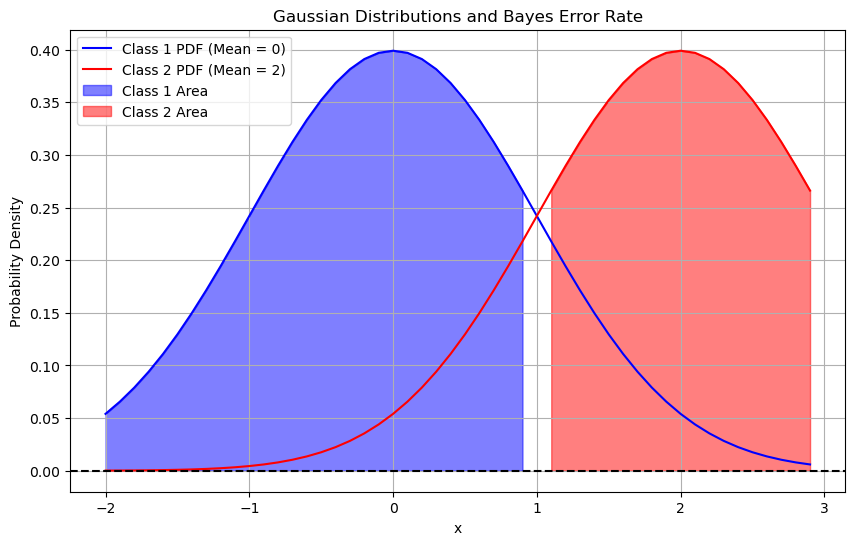

Complexity of mean calculation: O(n * d) = O(100 * 10) = O(1000)
Complexity of covariance calculation: O(d^2 * n) = O(10^2 * 100) = O(10000)
Complexity of determinant calculation: O(d^2) = O(100)
Complexity of inverse calculation: O(d^3) = O(1000)
Total computational complexity for learning: O(n * d^2) = O(12100)


In [3]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the Gaussian probability density function
def gaussian_pdf(x, mean, variance):
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

# Function to calculate the Bayes error rate
def bayes_error_rate(mu1, mu2, sigma):
    # Mahalanobis distance
    r2 = ((mu1 - mu2) ** 2) / sigma
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-r2 / 2)

# Parameters
mu1 = 0
mu2 = 2
sigma = 1
x_range = [i / 10.0 for i in range(-20, 30)]  # Range of x values

# Calculate probabilities
pdf1 = [gaussian_pdf(x, mu1, sigma) for x in x_range]
pdf2 = [gaussian_pdf(x, mu2, sigma) for x in x_range]

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.plot(x_range, pdf1, label='Class 1 PDF (Mean = 0)', color='blue')
plt.plot(x_range, pdf2, label='Class 2 PDF (Mean = 2)', color='red')

# Create masks for filling areas
class1_mask = [pdf1[i] > pdf2[i] for i in range(len(pdf1))]
class2_mask = [pdf2[i] > pdf1[i] for i in range(len(pdf2))]

plt.fill_between(x_range, pdf1, where=class1_mask, color='blue', alpha=0.5, label='Class 1 Area')
plt.fill_between(x_range, pdf2, where=class2_mask, color='red', alpha=0.5, label='Class 2 Area')

plt.title('Gaussian Distributions and Bayes Error Rate')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()

# Computational complexity analysis
n_samples = 100  # Number of training samples
d_dimensions = 10  # Number of dimensions

# Calculating complexity
mean_complexity = n_samples * d_dimensions
cov_complexity = d_dimensions ** 2 * n_samples
determinant_complexity = d_dimensions ** 2
inverse_complexity = d_dimensions ** 3

total_complexity = mean_complexity + cov_complexity + determinant_complexity + inverse_complexity
print(f"Complexity of mean calculation: O(n * d) = O({n_samples} * {d_dimensions}) = O({mean_complexity})")
print(f"Complexity of covariance calculation: O(d^2 * n) = O({d_dimensions}^2 * {n_samples}) = O({cov_complexity})")
print(f"Complexity of determinant calculation: O(d^2) = O({determinant_complexity})")
print(f"Complexity of inverse calculation: O(d^3) = O({inverse_complexity})")
print(f"Total computational complexity for learning: O(n * d^2) = O({total_complexity})")
